In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [50]:
data = pd.read_csv('/content/electric-car-sales-share-NEW.csv')

In [51]:
data.head(5)

,Entity,Code,Year,Share of new cars that are electric
0,Belgium,BEL,2010,0.01
1,China,CHN,2010,0.01
2,Europe,0,2010,14.00
3,European Union (27),0,2010,12.00
4,France,FRA,2010,85.00


In [52]:
data.shape

(444, 4)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Entity                               444 non-null    object 
 1   Code                                 444 non-null    object 
 2   Year                                 444 non-null    int64  
 3   Share of new cars that are electric  444 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 14.0+ KB


In [54]:
data.describe()

,Year,Share of new cars that are electric
count,444.000000,444.000000
mean,2016.297297,15.403018
std,3.610480,22.948672
min,2010.000000,0.010000
25%,2013.000000,0.600000
50%,2016.000000,3.000000
75%,2019.000000,21.000000
max,2022.000000,99.000000


In [55]:
data.isnull().sum()

,0
Entity,0
Code,0
Year,0
Share of new cars that are electric,0


In [56]:
data = data.dropna()

In [57]:
data.isnull().sum()

,0
Entity,0
Code,0
Year,0
Share of new cars that are electric,0


In [62]:
X = data.iloc[:,2]
X.head(5)

,Year
0,2010
1,2010
2,2010
3,2010
4,2010


In [63]:
y = data.iloc[:,-1]
y.head(5)

,Share of new cars that are electric
0,0.01
1,0.01
2,14.00
3,12.00
4,85.00


Text(0, 0.5, 'Share of new cars that are electric')

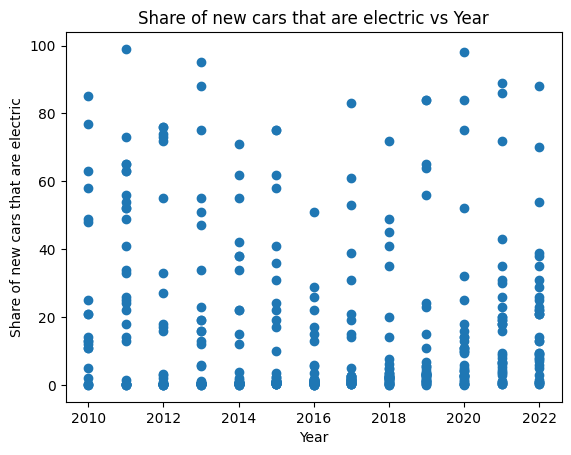

In [64]:
plt.scatter(X,y)
plt.title('Share of new cars that are electric vs Year')
plt.xlabel('Year')
plt.ylabel('Share of new cars that are electric')

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=51)

In [66]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(297,)
(147,)
(297,)
(147,)


In [67]:
linear = LinearRegression()
linear.fit(np.array(X_train).reshape(-1,1),y_train)

LinearRegression()

In [68]:
linear.coef_

array([-0.70011137])

In [69]:
linear.intercept_

1427.118277393127

In [70]:
Y_pred = linear.predict(np.array(X_test).reshape(-1,1))

In [71]:
Y_pred

array([17.09397849, 12.1931989 , 19.1943126 , 19.89442397, 12.89331027,
       14.99364438, 11.49308753, 12.1931989 , 14.99364438, 17.79408986,
       12.1931989 , 13.59342164, 16.39386712, 12.89331027, 11.49308753,
       12.1931989 , 19.1943126 , 14.99364438, 13.59342164, 18.49420123,
       17.09397849, 13.59342164, 14.99364438, 18.49420123, 13.59342164,
       14.99364438, 13.59342164, 17.09397849, 17.79408986, 17.09397849,
       12.1931989 , 14.29353301, 16.39386712, 14.99364438, 11.49308753,
       13.59342164, 18.49420123, 15.69375575, 19.1943126 , 12.89331027,
       11.49308753, 17.79408986, 16.39386712, 14.99364438, 12.1931989 ,
       12.1931989 , 14.29353301, 14.29353301, 17.79408986, 15.69375575,
       12.89331027, 14.29353301, 16.39386712, 18.49420123, 17.79408986,
       19.89442397, 12.89331027, 19.89442397, 13.59342164, 14.29353301,
       12.89331027, 15.69375575, 13.59342164, 11.49308753, 17.79408986,
       14.99364438, 12.1931989 , 14.99364438, 12.89331027, 14.99

In [72]:
y_test

,Share of new cars that are electric
145,0.14
393,3.60
29,25.00
7,2.00
345,10.00
...,...
292,3.60
226,1.00
64,72.00
45,49.00


In [73]:
score = r2_score(y_test,Y_pred)
score

-0.006494210152243385

Text(0, 0.5, 'Share of new cars that are electric')

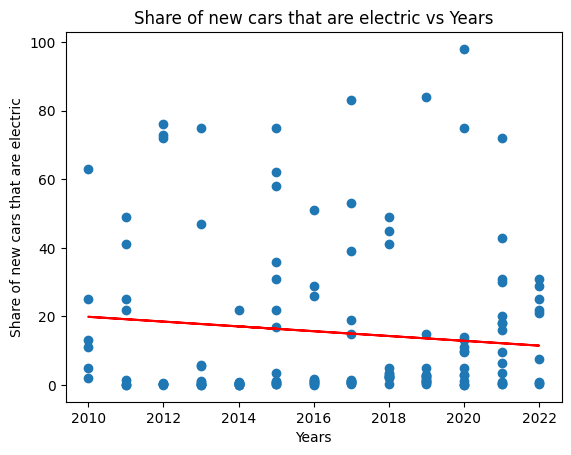

In [75]:
plt.scatter(X_test,y_test)
plt.plot(X_test,Y_pred,color='red')
plt.title('Share of new cars that are electric vs Years')
plt.xlabel('Years')
plt.ylabel('Share of new cars that are electric')